In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import (train_test_split,
                                     GridSearchCV)
from sklearn.ensemble import (ExtraTreesRegressor,
                              GradientBoostingRegressor,
                              RandomForestRegressor)
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import HuberRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.metrics import (root_mean_squared_error,
                             r2_score,
                             mean_absolute_error,
                             mean_squared_error)

Размеры датасета
Строк: 8368
Столбцов: 17

Кол-во пропущенных значений: 0

Колонки и их типы:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8368 entries, 0 to 8367
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Name                    8368 non-null   object 
 1   Location                8368 non-null   object 
 2   Cuisine                 8368 non-null   object 
 3   Rating                  8368 non-null   float64
 4   Seating Capacity        8368 non-null   int64  
 5   Average Meal Price      8368 non-null   float64
 6   Marketing Budget        8368 non-null   int64  
 7   Social Media Followers  8368 non-null   int64  
 8   Chef Experience Years   8368 non-null   int64  
 9   Number of Reviews       8368 non-null   int64  
 10  Avg Review Length       8368 non-null   float64
 11  Ambience Score          8368 non-null   float64
 12  Service Quality Score   8368 non-null   float64
 13 

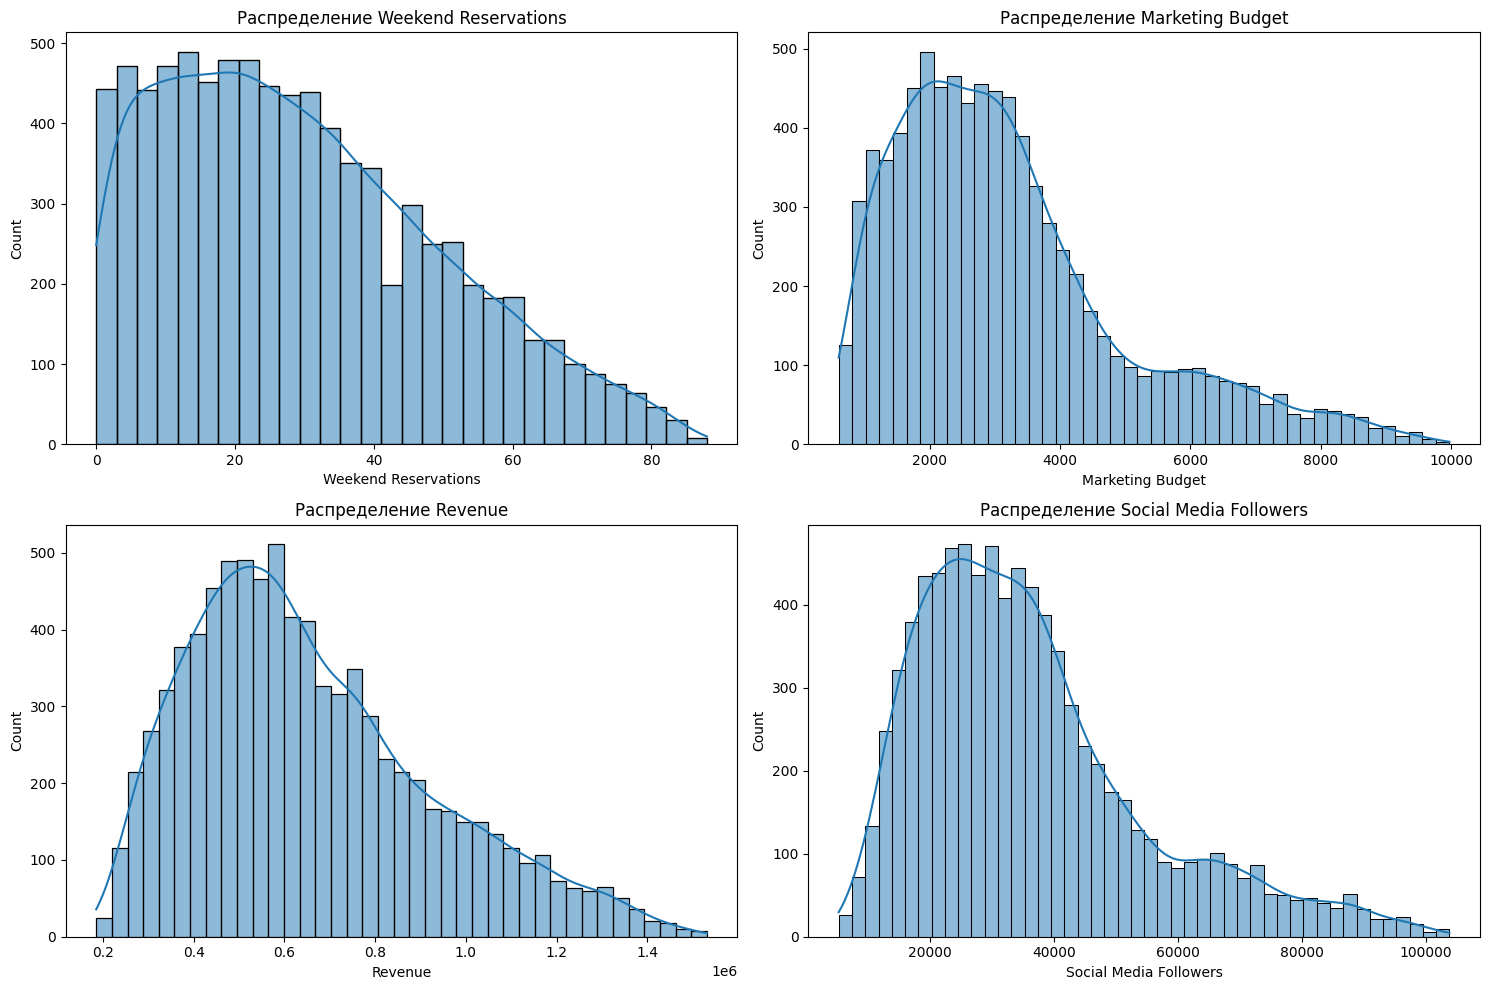

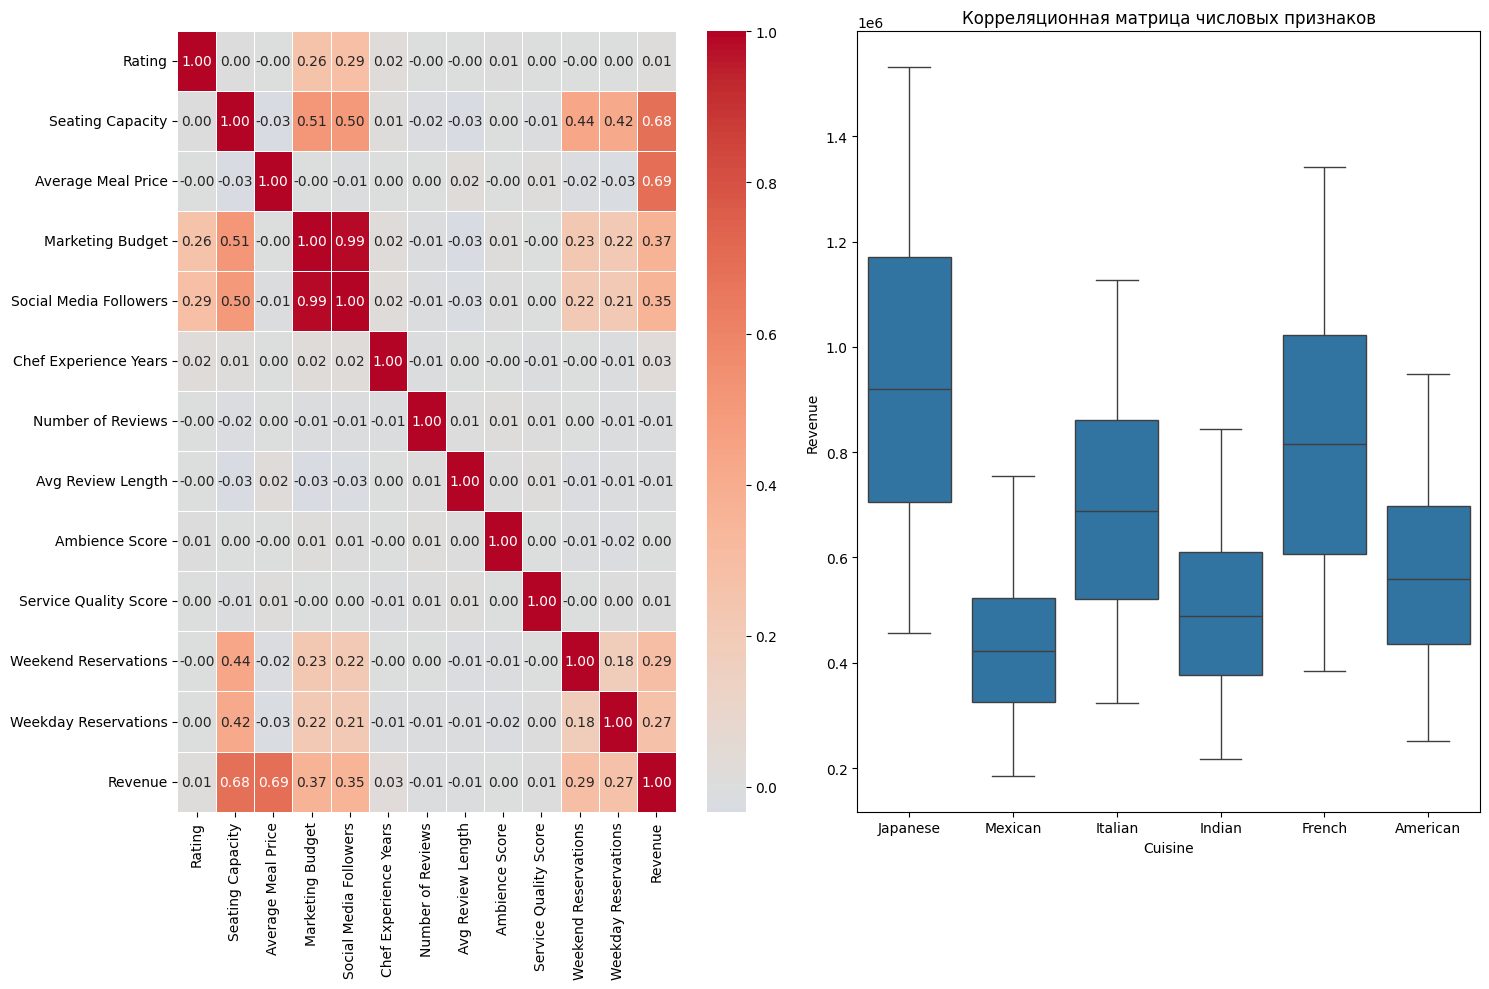

In [2]:
df = pd.read_csv('restaurant_data.csv')

print("Размеры датасета")
print(f"Строк: {df.shape[0]}")
print(f"Столбцов: {df.shape[1]}")
print(f"\nКол-во пропущенных значений: {df.isna().sum().sum()}\n")
print("Колонки и их типы:")
print(f"{df.info()}")

numeric_cols = ['Weekend Reservations','Marketing Budget', 'Revenue', 'Social Media Followers']

fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.ravel()

for i, col in enumerate(numeric_cols):
    sns.histplot(df[col], ax=axes[i], kde=True)
    axes[i].set_title(f'Распределение {col}')
    axes[i].set_xlabel(col)

plt.tight_layout()
plt.show()

fig, axes = plt.subplots(1, 2, figsize=(15, 10))
axes = axes.ravel()

numeric_df = df.select_dtypes(include=['number'])
correlation_matrix = numeric_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            fmt='.2f', linewidths=0.5, ax=axes[0])
plt.title('Корреляционная матрица числовых признаков')
sns.boxplot(data=df, x='Cuisine', y='Revenue', ax=axes[1])
plt.tight_layout()
plt.show()



In [3]:
# удаляем столбец с именем ресторана
df1 = df.drop('Name', axis=1)

# посмотрим какие столбцы имеют не числовые значение
df1.select_dtypes(include='object').head()

,Location,Cuisine,Parking Availability
0,Rural,Japanese,Yes
1,Downtown,Mexican,Yes
2,Rural,Italian,No
3,Rural,Italian,Yes
4,Downtown,Japanese,No


In [4]:
# преобразовываем категориальные признаки
df1['Parking Availability'] = df1['Parking Availability'].replace({'Yes': 1, 'No': 0})
location_variables = pd.get_dummies(df1['Location'], dtype=int)
df1_proc = pd.concat([df1.drop(['Location'],axis=1), location_variables], axis=1)
df1_proc = df1_proc.drop('Cuisine', axis=1)

/tmp/ipython-input-2633349005.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1['Parking Availability'] = df1['Parking Availability'].replace({'Yes': 1, 'No': 0})


In [5]:
X = df1_proc.drop('Revenue', axis=1)
y = df1_proc['Revenue']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [6]:
# сначала посмотрю что дадут модели при наличии столбцов с корреляцией 0,7


mse_ = []
r2_ = []
mae_ = []
rmse_ = []

rfc = RandomForestRegressor()
etr = ExtraTreesRegressor()
gbr = GradientBoostingRegressor()
dtr = DecisionTreeRegressor()
hr = HuberRegressor()
lgb = LGBMRegressor()
xgb = XGBRegressor()

models = [rfc, etr, gbr, dtr, hr, lgb, xgb]

names = ['RandomForest', 'ExtraTrees', 'GradientBoosting',
         'DecisionTree', 'Huber', 'LGBM', 'XGB']

index = 0
for name, model in enumerate(models):
    model.fit(x_train, y_train)
    pred = model.predict(x_test)
    print(names[index])

    mse = mean_squared_error(pred, y_test)
    rmse = root_mean_squared_error(pred, y_test)
    mae = mean_absolute_error(pred, y_test)
    r2 = r2_score(pred, y_test)

    mse_.append(mse)
    mae_.append(mae)
    r2_.append(r2)
    rmse_.append(rmse)

    print("MSE: ", mse)
    print("RMSE: ", rmse)
    print("MAE: ", mae)
    print("r2: ", r2)
    print("-"*50)
    index +=1

RandomForest
MSE:  68708801.62823807
RMSE:  8289.077248297188
MAE:  6295.166897570694
r2:  0.9990358210485539
--------------------------------------------------
ExtraTrees
MSE:  43849647.387120984
RMSE:  6621.906627786365
MAE:  5145.780760294701
r2:  0.99938658470055
--------------------------------------------------
GradientBoosting
MSE:  115018355.14043939
RMSE:  10724.661073453062
MAE:  8252.887570983688
r2:  0.9983788397228484
--------------------------------------------------
DecisionTree
MSE:  262352604.66561309
RMSE:  16197.302388534119
MAE:  12527.875228992432
r2:  0.9963563422665926
--------------------------------------------------


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_huber.py:343: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Huber
MSE:  13712658872.693886
RMSE:  117101.0626454512
MAE:  90568.42113580738
r2:  0.6019942248440451
--------------------------------------------------
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001349 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1746
[LightGBM] [Info] Number of data points in the train set: 5857, number of used features: 16
[LightGBM] [Info] Start training from score 654659.907693
LGBM
MSE:  44823182.43289832
RMSE:  6695.011757487683
MAE:  5065.874887155922
r2:  0.9993724377752832
--------------------------------------------------
XGB
MSE:  67637797.6154042
RMSE:  8224.220182813942
MAE:  6356.039807347672
r2:  0.9990544657832388
--------------------------------------------------


Как видим даже без подбора параметров все модели кроме Губера дают очень высокие метрики. Далее посмотрим для данных без высоких корреляций

In [7]:
df1 = pd.concat([df1.drop(['Location'],axis=1), location_variables], axis=1)
df1 = df1.drop('Cuisine', axis=1)
df1 = df1.drop(['Average Meal Price', 'Seating Capacity'], axis=1)
df1

,Rating,Marketing Budget,Social Media Followers,Chef Experience Years,Number of Reviews,Avg Review Length,Ambience Score,Service Quality Score,Parking Availability,Weekend Reservations,Weekday Reservations,Revenue,Downtown,Rural,Suburban
0,4.0,2224,23406,13,185,161.924906,1.3,7.0,1,13,4,638945.52,0,1,0
1,3.2,4416,42741,8,533,148.759717,2.6,3.4,1,48,6,490207.83,1,0,0
2,4.7,2796,37285,18,853,56.849189,5.3,6.7,0,27,14,541368.62,0,1,0
3,4.4,1167,15214,13,82,205.433265,4.6,2.8,1,9,17,404556.80,0,1,0
4,4.9,3639,40171,9,78,241.681584,8.6,2.1,0,37,26,1491046.35,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8363,3.4,1102,11298,11,380,253.919515,9.5,5.0,1,37,0,434653.45,0,0,1
8364,3.7,1988,20432,9,713,175.590195,2.7,2.6,0,37,21,414977.92,0,1,0
8365,4.7,5949,63945,6,436,222.953647,4.8,1.7,1,83,21,930395.87,1,0,0
8366,3.1,707,7170,1,729,178.482851,6.1,2.1,0,6,21,311493.48,0,1,0


In [14]:
X = df1.drop('Revenue', axis=1)
y = df1['Revenue']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

figure = []

mse_ = []
r2_ = []
mae_ = []
rmse_ = []


rfc = RandomForestRegressor()
etr = ExtraTreesRegressor()
gbr = GradientBoostingRegressor()
dtr = DecisionTreeRegressor()
hr = HuberRegressor()
lgb = LGBMRegressor()
xgb = XGBRegressor()

models = [rfc, etr, gbr, dtr, hr, lgb, xgb]

names = ['RandomForest', 'ExtraTrees', 'GradientBoosting',
         'DecisionTree', 'Huber', 'LGBM', 'XGB']

index = 0
for name, model in enumerate(models):
    model.fit(x_train, y_train)
    pred = model.predict(x_test)
    print(names[index])

    mse = mean_squared_error(pred, y_test)
    rmse = root_mean_squared_error(pred, y_test)
    mae = mean_absolute_error(pred, y_test)
    r2 = r2_score(pred, y_test)

    mse_.append(mse)
    mae_.append(mae)
    r2_.append(r2)
    rmse_.append(rmse)

    print("MSE: ", mse)
    print("RMSE: ", rmse)
    print("MAE: ", mae)
    print("r2: ", r2)
    print("-"*50)

    index +=1

RandomForest
MSE:  62903777.09141229
RMSE:  7931.190143440787
MAE:  6100.886033771404
r2:  0.9990602277666963
--------------------------------------------------
ExtraTrees
MSE:  44403120.329203084
RMSE:  6663.566637259891
MAE:  5167.032945519722
r2:  0.9993391964869975
--------------------------------------------------
GradientBoosting
MSE:  109964106.07177454
RMSE:  10486.37716619875
MAE:  7984.588161617261
r2:  0.9983545051901392
--------------------------------------------------
DecisionTree
MSE:  245920344.78185096
RMSE:  15681.847620157867
MAE:  11980.56697729988
r2:  0.9963459086100118
--------------------------------------------------


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_huber.py:343: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Huber
MSE:  12732115213.416786
RMSE:  112836.67494842617
MAE:  85653.98396849592
r2:  0.6115430363429313
--------------------------------------------------
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001358 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1746
[LightGBM] [Info] Number of data points in the train set: 5857, number of used features: 16
[LightGBM] [Info] Start training from score 656786.519072
LGBM
MSE:  40871439.36900775
RMSE:  6393.077456828421
MAE:  4946.343821167135
r2:  0.9993921573609678
--------------------------------------------------
XGB
MSE:  73538952.2188472
RMSE:  8575.48553837316
MAE:  6563.442738450816
r2:  0.9989084981012096
--------------------------------------------------
